In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [2]:
%run -i ./tools/train_net.py --gpu 0 --solver models/rpn_uboone/resnet6x6_nu_weights_nu/faster_rcnn_end2end/solver.prototxt --imdb rpn_uboone_train_1 --iters 700000 --cfg experiments/cfgs/resnet_nu_cosmic_train_v04_brett.yml --weights /stage2/drinkingkazu/brett/nu_1plane/snapshot_resnet_v01_iter_9000.caffemodel.h5 

Called with args:
Namespace(cfg_file='experiments/cfgs/resnet_nu_cosmic_train_v04_brett.yml', gpu_id=0, imdb_name='rpn_uboone_train_1', max_iters=700000, pretrained_model='/stage2/drinkingkazu/brett/nu_1plane/snapshot_resnet_v01_iter_9000.caffemodel.h5', randomize=False, set_cfgs=None, solver='models/rpn_uboone/resnet6x6_nu_weights_nu/faster_rcnn_end2end/solver.prototxt')
Using config:
{'DATA_DIR': '/home/vgenty/segment/py-faster-rcnn/data',
 'DEBUG': False,
 'DEDUP_BOXES': 0.0625,
 'DEVKIT': 'NuDevKitv04_brett',
 'EPS': 1e-14,
 'EXP_DIR': 'faster_rcnn_end2end',
 'GPU_ID': 0,
 'HEIGHT': 864,
 'IMAGE2DPROD': 'tpc',
 'IMAGE_LOADER': 'BNBNuv04Loader',
 'IMAX': 10.0,
 'IMIN': 0.5,
 'IOCFG': 'io.cfg',
 'MATLAB': 'matlab',
 'MODELS_DIR': '/home/vgenty/py-faster-rcnn/models/rpn_uboone',
 'NCHANNELS': 1,
 'PIXEL_MEANS': array([[[ 0.]]]),
 'RNG_SEED': 9,
 'ROIPROD': 'tpc',
 'ROOT_DIR': '/home/vgenty/segment/py-faster-rcnn',
 'TEST': {'BBOX_REG': True,
          'HAS_RPN': True,
          'MAX_S

/home/vgenty/segment/py-faster-rcnn/tools/../lib/rpn/proposal_target_layer.py:157: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bbox_targets[ind, start:end] = bbox_target_data[ind, 1:]
/home/vgenty/segment/py-faster-rcnn/tools/../lib/rpn/proposal_target_layer.py:158: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  bbox_inside_weights[ind, start:end] = cfg.TRAIN.BBOX_INSIDE_WEIGHTS


KeyboardInterrupt: 

In [11]:
_sw.solver.net.blobs['data'].data.shape
from fast_rcnn.bbox_transform import clip_boxes, bbox_transform_inv  

(756, 864, 1)


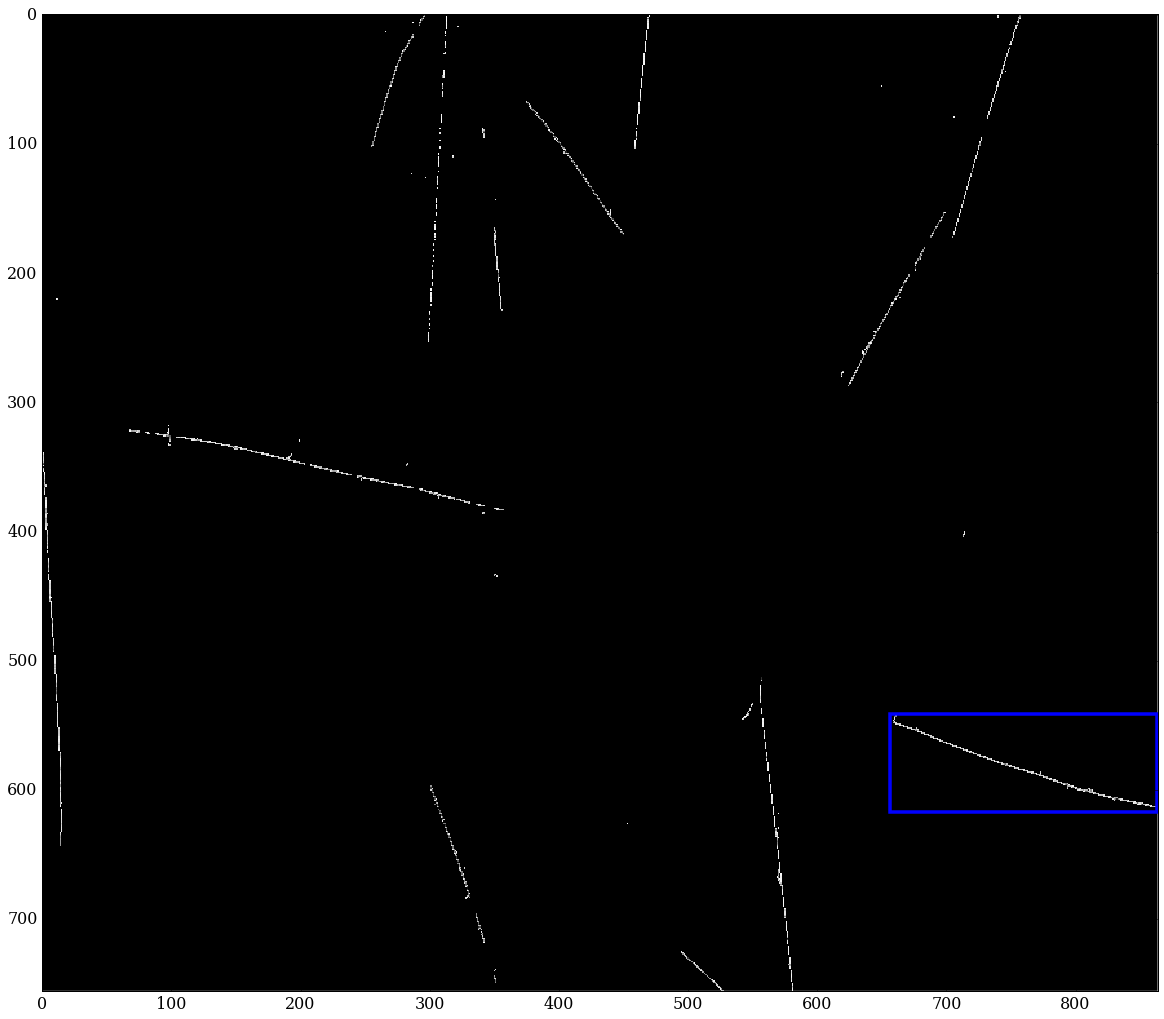

In [27]:
#_sw.solver.step(1)

scores = _sw.solver.net.blobs['cls_score'].data
boxes = _sw.solver.net.blobs['rois'].data[:, 1:5]
box_deltas = _sw.solver.net.blobs['bbox_pred'].data
pred_boxes = bbox_transform_inv(boxes, box_deltas) 
pred_boxes = clip_boxes(pred_boxes, (756,864))
cls_ind = 0
cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
cls_scores = scores[:, cls_ind]
dets = np.hstack((cls_boxes,
                  cls_scores[:, np.newaxis])).astype(np.float32) 


data = _sw.solver.net.blobs['data'].data
iminfo = _sw.solver.net.blobs['im_info'].data
gtboxes = _sw.solver.net.blobs['gt_boxes'].data
print data[0].transpose(2,1,0).shape
image = data[0].transpose(2,1,0).astype(np.float32)

fig,ax = plt.subplots(figsize=(20,20))
imm = np.zeros([image.shape[0],image.shape[1],3])
for i in xrange(3):
    imm[:,:,i] = image[:,:,0]
    
image = imm.astype(np.int8)
plt.imshow(image,cmap='Greys',interpolation='none')
a = [ gt for gt in gtboxes ]
for aa in a:
    ax.add_patch(plt.Rectangle( (aa[1],aa[0]),aa[3]-aa[1], 
                                 aa[2]-aa[0],
                                 fill=False,
                                 edgecolor='blue',
                                 linewidth=3.5))
    
#put in the top class

#ax.add_patch(plt.Rectangle((rr[1],rr[0]),
#                            rr[3]-rr[1],
#                            rr[2]-rr[0],
#                            fill=False,
#                            edgecolor='purple',
#                            linewidth=3.5))

plt.show()

In [ ]:
#save the model
_sw.train_model(1)

In [ ]:
# It is the size of the responses at the (5th) convolutional layer. 
# Usually, it has a resolution of a downsampled image by a factor of 16 
# (plus/minus offsets due to pooling / padding).
for i in xrange(18):
    fig,ax = plt.subplots(figsize=(10,6))
    plt.imshow(_sw.solver.net.blobs['rpn_cls_score'].data[0][i],cmap='Greys',interpolation='none')
    #plt.savefig('_{}.jpeg'.format(i), format='jpeg', dpi=200)
    plt.show()

In [3]:
s1 = []
s2 = []
i__=[]
loss_cls=[]
loss_bbox=[]
rpn_cls_loss=[]
rpn_loss_bbox=[]
#_sw.solver.net.blobs.keys()

In [16]:
for i in xrange(10000):
    i__.append(i)
    _sw.solver.step(1)
    scores = _sw.solver.net.blobs['cls_score'].data
    #boxes = _sw.solver.net.blobs['rois'].data[:, 1:5]
    #box_deltas = _sw.solver.net.blobs['bbox_pred'].data
    #red_boxes = bbox_transform_inv(boxes, box_deltas)  
    #red_boxes = clip_boxes(pred_boxes, (864,864))
    #cls_ind = 0
    #cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
    #cls_scores = scores[:, cls_ind]
    #dets = np.hstack((cls_boxes,
    #                 cls_scores[:, np.newaxis])).astype(np.float32) 
    s1.append(scores[0][0])
    s2.append(scores[0][1])
    loss_cls.append(_sw.solver.net.blobs['loss_cls'].data.copy())
    loss_bbox.append(_sw.solver.net.blobs['loss_bbox'].data.copy())
    rpn_cls_loss.append(_sw.solver.net.blobs['rpn_cls_loss'].data.copy())
    rpn_loss_bbox.append(_sw.solver.net.blobs['rpn_loss_bbox'].data.copy())
    #break
    

KeyboardInterrupt: 

In [6]:
print loss_cls
print loss_bbox
print rpn_cls_loss
print rpn_loss_bbox

[array(0.3127991259098053, dtype=float32), array(0.2507030963897705, dtype=float32)]
[array(3.939956513931975e-05, dtype=float32), array(0.1338663101196289, dtype=float32)]
[array(0.6917350888252258, dtype=float32), array(0.6920430660247803, dtype=float32)]
[array(0.03093942254781723, dtype=float32), array(0.0009529730305075645, dtype=float32)]


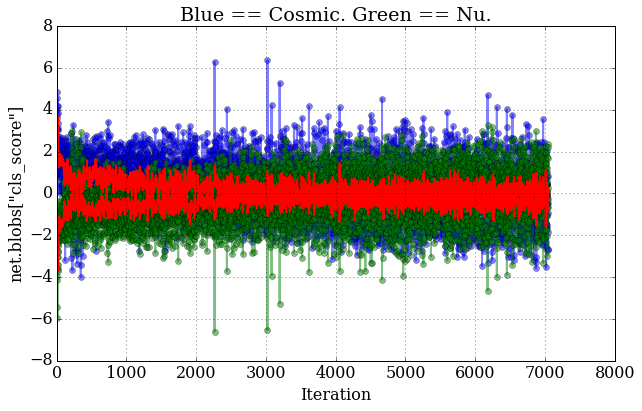

In [13]:
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['font.family'] = 'serif'
import pandas as pd
fig,ax = plt.subplots(figsize=(10,6))
ss1 = pd.Series(s1)
ss2 = pd.Series(s2)
ax.plot(np.arange(0,len(s1),1),ss1.rolling(window=1).mean(),'-o',alpha=0.5,lw=2,color='blue')
ax.plot(np.arange(0,len(s2),1),ss2.rolling(window=1).mean(),'-o',alpha=0.5,lw=2,color='green')
ax.plot(np.arange(0,len(s1),1),ss1.rolling(window=10).mean(),'-',alpha=1.0,lw=2,color='red')
ax.plot(np.arange(0,len(s2),1),ss2.rolling(window=10).mean(),'-',alpha=1.0,lw=2,color='red') 
ax.set_xlabel("Iteration")
ax.set_ylabel("net.blobs[\"cls_score\"]")
ax.set_title("Blue == Cosmic. Green == Nu.")
#plt.savefig('as_nu_cosmic_trains___k.jpeg'.format(i), format='jpeg', dpi=200)
plt.grid()
plt.show()